# Capstone Project - The Battle of Neighborhoods

## Coursera Applied Data Science Capstone - Final Project

## Importing libraries

In [1]:
import pandas as pd
import requests
import numpy as np
from requests import request
import json
from pandas.io.json import json_normalize
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors
!pip install folium
import folium
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt
import seaborn as sns

     |████████████████████████████████| 102kB 20.6MB/s ta 0:00:01


## Scraping addresses data from Milan Municipality website

In [2]:
response=request(url='http://dati.comune.milano.it/it/api/3/action/datastore_search?resource_id=533b4e63-3d78-4bb5-aeb4-6c5f648f7f21&limit=100000', method='get')
addresses=response.json()
jtopy=json.dumps(addresses) #json.dumps take a dictionary as input and returns a string as output
data=json.loads(jtopy)
data=json_normalize(data['result']['records'])
data.head()

,ANNCSU,ANNO_SOPPRESSIONE,BARRA,BARRA2,CAP,CODICE_VIA,DATA_APPLICAZIONE,DATA_ATTIVAZIONE,DATA_INTITOLAZIONE,DATA_MODFINE,...,RESIDENZIALE,STATO,STATOCIVICO,TIPO,ULTIMA_MODIFICA,WEBMERC_X,WEBMERC_Y,WGS84_X,WGS84_Y,_id
0,VITTORIO EMANUELE SECONDO,0.0,,N17,20121.0,10,NaN,20191115.0,0.0,0,...,0,Attiva,Iter in corso,Galleria,20191115,"1023055,4691","5695107,8462","514873,7602","5034683,2157",150
1,VITTORIO EMANUELE SECONDO,0.0,,N21,20121.0,10,NaN,20191115.0,0.0,0,...,0,Attiva,Iter in corso,Galleria,20191115,"1023084,0162","5695107,1081","514893,8087","5034682,7465",151
2,VITTORIO EMANUELE SECONDO,0.0,,N22,20121.0,10,NaN,20191115.0,0.0,0,...,0,Attiva,Iter in corso,Galleria,20191115,"1023091,3417","5695107,0785","514898,9531","5034682,738",152
3,VITTORIO EMANUELE SECONDO,0.0,,N04,20121.0,10,NaN,20191114.0,0.0,0,...,0,Attiva,Iter in corso,Galleria,20191121,"1023012,7795","5695026,0543","514843,9165","5034625,8957",153
4,VITTORIO EMANUELE SECONDO,0.0,,N01,20121.0,10,NaN,20200123.0,0.0,0,...,0,Attiva,Iter in corso,Galleria,20200123,"1022958,0035","5695136,4087","514805,2675","5034703,0458",154


In [3]:
data.shape

(63350, 39)

Our dataframe contains data from 63350 addresses, now we will group them by "NIL" (Nuclei di Identità Locale), literally "Local identity units, that is neighborhoods.

We will then consider the average of latitude and longitude values relevant to involved addresses

In [4]:
data_grouped = data.groupby('NIL').mean().reset_index()
data_grouped

,NIL,ANNO_SOPPRESSIONE,CAP,CODICE_VIA,DATA_APPLICAZIONE,DATA_ATTIVAZIONE,DATA_INTITOLAZIONE,DATA_MODFINE,DATA_SOPPRESSIONE,IDMASTER,ID_NIL,LAT_WGS84,LONG_WGS84,MUNICIPIO,NUMERO,PASSOCARRAIO,RESIDENZIALE,ULTIMA_MODIFICA,_id
0,,0.0,20149.888889,6432.047619,2.004208e+07,2.004208e+07,0.000000e+00,0.0,2.010094e+07,42261.238095,NaN,45.477582,9.123502,6.692308,24.904762,0.000000,0.904762,2.012916e+07,52314.000000
1,ADRIANO,0.0,20128.264220,2487.669725,1.887741e+07,2.007443e+07,4.952807e+06,0.0,1.931894e+06,58833.409174,17.0,45.511738,9.245336,2.000000,44.974312,0.120000,0.739450,2.011345e+07,22875.559633
2,AFFORI,0.0,20160.996109,1514.628405,1.980915e+07,2.006243e+07,1.478607e+05,0.0,8.466080e+05,37806.991245,80.0,45.514814,9.172760,9.000000,23.098249,0.115183,0.792802,2.010281e+07,12748.814202
3,ASSIANO,0.0,20152.620690,6799.017241,1.930128e+07,2.007343e+07,7.234406e+06,0.0,4.333239e+06,73352.172414,87.0,45.455063,9.062976,7.000000,76.603448,0.056604,0.500000,2.011424e+07,54426.568966
4,BAGGIO - Q.RE DEGLI OLMI - Q.RE VALSESIA,0.0,20152.390118,6750.748525,1.987326e+07,2.005203e+07,9.162740e+05,0.0,5.186439e+05,54854.229351,55.0,45.461175,9.088395,7.000000,38.005900,0.051013,0.857670,2.009117e+07,53868.826696
5,BANDE NERE,0.0,20146.364561,6516.755265,1.984312e+07,2.005842e+07,1.115121e+06,0.0,7.136699e+05,59946.496732,52.0,45.460703,9.138751,6.543936,21.692810,0.069872,0.826434,2.009751e+07,50660.411038
6,BARONA,0.0,20142.000000,5400.701124,1.954431e+07,2.006677e+07,3.716968e+06,0.0,7.758446e+05,63684.961798,46.0,45.432688,9.154456,6.000000,30.343820,0.111905,0.795506,2.010368e+07,43034.411236
7,BICOCCA,0.0,20126.000000,1567.121302,1.914152e+07,2.008078e+07,5.683351e+06,0.0,3.512231e+06,61751.843195,15.0,45.517449,9.210782,9.000000,101.985207,0.163522,0.547337,2.011782e+07,13158.289941
8,BOVISA,0.0,20157.828607,1783.069051,1.956221e+07,2.007036e+07,9.137788e+05,0.0,1.441318e+06,49176.045623,77.0,45.501859,9.165413,9.000000,26.758323,0.084525,0.727497,2.010875e+07,13779.770654
9,BOVISASCA,0.0,20158.088608,5265.308017,1.977061e+07,2.005796e+07,1.223343e+06,0.0,2.017691e+05,55324.603376,81.0,45.516964,9.154238,9.000000,32.689873,0.073913,0.858650,2.009651e+07,43501.367089


In [5]:
data_grouped.shape

(89, 19)

In [6]:
filter = data_grouped['NIL'] != '' #filtering blank data
data_filtered=data_grouped[['NIL','LAT_WGS84','LONG_WGS84']]
data_filtered = data_filtered[filter]
data_filtered

,NIL,LAT_WGS84,LONG_WGS84
1,ADRIANO,45.511738,9.245336
2,AFFORI,45.514814,9.172760
3,ASSIANO,45.455063,9.062976
4,BAGGIO - Q.RE DEGLI OLMI - Q.RE VALSESIA,45.461175,9.088395
5,BANDE NERE,45.460703,9.138751
6,BARONA,45.432688,9.154456
7,BICOCCA,45.517449,9.210782
8,BOVISA,45.501859,9.165413
9,BOVISASCA,45.516964,9.154238
10,BRERA,45.473413,9.187425


In [7]:
neighborhood=data_filtered.rename(columns = {'NIL':'Neighborhood','LAT_WGS84':'Latitude','LONG_WGS84':'Longitude'})
neighborhood

,Neighborhood,Latitude,Longitude
1,ADRIANO,45.511738,9.245336
2,AFFORI,45.514814,9.172760
3,ASSIANO,45.455063,9.062976
4,BAGGIO - Q.RE DEGLI OLMI - Q.RE VALSESIA,45.461175,9.088395
5,BANDE NERE,45.460703,9.138751
6,BARONA,45.432688,9.154456
7,BICOCCA,45.517449,9.210782
8,BOVISA,45.501859,9.165413
9,BOVISASCA,45.516964,9.154238
10,BRERA,45.473413,9.187425


We now have 88 different neighborhoods

## Getting nearby venues from Foursquare

In [8]:
# The code was removed by Watson Studio for sharing.

In [9]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [10]:
milan_venues = getNearbyVenues(names=neighborhood['Neighborhood'],
                                   latitudes=neighborhood['Latitude'],
                                   longitudes=neighborhood['Longitude']
                                  )

ADRIANO
AFFORI
ASSIANO
BAGGIO - Q.RE DEGLI OLMI - Q.RE VALSESIA
BANDE NERE
BARONA
BICOCCA
BOVISA
BOVISASCA
BRERA
BRUZZANO
BUENOS AIRES - PORTA VENEZIA - PORTA MONFORTE
CANTALUPA
CASCINA MERLATA
CHIARAVALLE
CIMIANO - ROTTOLE - Q.RE FELTRE
CITTA' STUDI
COMASINA
CORSICA
DE ANGELI - MONTE ROSA
DERGANO
DUOMO
FARINI
FIGINO
FORZE ARMATE
GHISOLFA
GIAMBELLINO
GIARDINI P.TA VENEZIA
GORLA - PRECOTTO
GRATOSOGLIO - Q.RE MISSAGLIA - Q.RE TERRAZZE
GRECO - SEGNANO
GUASTALLA
ISOLA
LAMBRATE - ORTICA
LODI - CORVETTO
LORENTEGGIO
LORETO - CASORETTO - NOLO
MACIACHINI - MAGGIOLINA
MAGENTA - S. VITTORE
MAGGIORE - MUSOCCO - CERTOSA
MONCUCCO - SAN CRISTOFORO
MONLUE' - PONTE LAMBRO
MORIVIONE
MUGGIANO
NIGUARDA - CA' GRANDA - PRATO CENTENARO - Q.RE FULVIO TESTI
ORTOMERCATO
PADOVA - TURRO - CRESCENZAGO
PAGANO
PARCO BOSCO IN CITTA'
PARCO DEI NAVIGLI
PARCO DELLE ABBAZIE
PARCO FORLANINI - CAVRIANO
PARCO NORD
PARCO SEMPIONE
PORTA GARIBALDI - PORTA NUOVA
PORTA GENOVA
PORTA MAGENTA
PORTA TICINESE - CONCA DEL NAVIGLIO
POR

In [11]:
print(milan_venues.shape)
milan_venues.head()

(2406, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,ADRIANO,45.511738,9.245336,Cargo,45.508406,9.243159,Furniture / Home Store
1,ADRIANO,45.511738,9.245336,Osteria Ai 3/4,45.508452,9.243858,Italian Restaurant
2,ADRIANO,45.511738,9.245336,Zan Zara Zan,45.508652,9.242995,Café
3,ADRIANO,45.511738,9.245336,Unieuro,45.514146,9.244038,Electronics Store
4,ADRIANO,45.511738,9.245336,Esselunga,45.513782,9.244425,Supermarket


## Grouping Venues

In [12]:
milan_venues.groupby('Neighborhood').count() # number of venues returned for each neighborhood

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
ADRIANO,20,20,20,20,20,20
AFFORI,14,14,14,14,14,14
ASSIANO,3,3,3,3,3,3
BAGGIO - Q.RE DEGLI OLMI - Q.RE VALSESIA,13,13,13,13,13,13
BANDE NERE,22,22,22,22,22,22
BARONA,10,10,10,10,10,10
BICOCCA,33,33,33,33,33,33
BOVISA,38,38,38,38,38,38
BOVISASCA,22,22,22,22,22,22


In [13]:
# one hot encoding
milan_onehot = pd.get_dummies(milan_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
milan_onehot['Neighborhood'] = milan_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [milan_onehot.columns[-1]] + list(milan_onehot.columns[:-1])
milan_onehot = milan_onehot[fixed_columns]

milan_onehot.head()

,Yoga Studio,Accessories Store,Adult Education Center,African Restaurant,Airport,American Restaurant,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,...,Video Game Store,Video Store,Vietnamese Restaurant,Volleyball Court,Warehouse Store,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
milan_onehot.shape # new dataframe size

(2406, 266)

In [15]:
# group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
milan_grouped = milan_onehot.groupby('Neighborhood').mean().reset_index()
milan_grouped

,Neighborhood,Yoga Studio,Accessories Store,Adult Education Center,African Restaurant,Airport,American Restaurant,Aquarium,Arcade,Argentinian Restaurant,...,Video Game Store,Video Store,Vietnamese Restaurant,Volleyball Court,Warehouse Store,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store
0,ADRIANO,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00,0.0,0.000000,...,0.000000,0.0000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
1,AFFORI,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00,0.0,0.000000,...,0.000000,0.0000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
2,ASSIANO,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00,0.0,0.000000,...,0.000000,0.0000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
3,BAGGIO - Q.RE DEGLI OLMI - Q.RE VALSESIA,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00,0.0,0.000000,...,0.000000,0.0000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
4,BANDE NERE,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00,0.0,0.000000,...,0.000000,0.0000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
5,BARONA,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00,0.0,0.000000,...,0.000000,0.0000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
6,BICOCCA,0.000000,0.000000,0.0,0.000000,0.0,0.030303,0.00,0.0,0.000000,...,0.000000,0.0000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
7,BOVISA,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00,0.0,0.000000,...,0.000000,0.0000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
8,BOVISASCA,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00,0.0,0.000000,...,0.045455,0.0000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.045455
9,BRERA,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.01,0.0,0.000000,...,0.000000,0.0000,0.0,0.000000,0.0,0.030000,0.000000,0.0,0.000000,0.000000


In [16]:
milan_grouped.shape # new size

(87, 266)

In [17]:
# function to sort the venues in descending order

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [18]:
# new dataframe with the top 10 venues for each neighborhood

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = milan_grouped['Neighborhood']

for ind in np.arange(milan_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(milan_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,ADRIANO,Italian Restaurant,Supermarket,Coffee Shop,Hostel,Furniture / Home Store,Bus Stop,Café,Soccer Field,Bistro,Pharmacy
1,AFFORI,Pizza Place,Park,Café,Cocktail Bar,Train,Hotel,Supermarket,Pool Hall,Italian Restaurant,Fried Chicken Joint
2,ASSIANO,Pizza Place,Restaurant,Mediterranean Restaurant,Food Truck,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Women's Store
3,BAGGIO - Q.RE DEGLI OLMI - Q.RE VALSESIA,Pizza Place,Italian Restaurant,Convenience Store,Park,Café,Supermarket,Soccer Field,Bar,Plaza,Gastropub
4,BANDE NERE,Restaurant,Hotel,Café,Pizza Place,Ice Cream Shop,Food Court,Supermarket,Pharmacy,Pub,Hobby Shop


## K-Means Clustering - finding optimal value for k

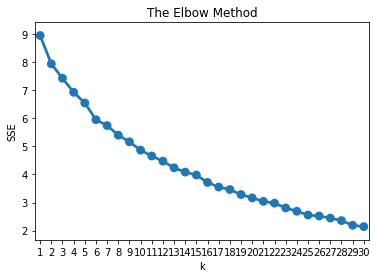

In [19]:
milan_grouped_clustering = milan_grouped.drop('Neighborhood', 1)

sse = {}

# Fit KMeans and calculate SSE for each k
for k in range(1, 31):
  
    # Initialize KMeans with k clusters and fit it 
    kmeans = KMeans(n_clusters=k, random_state=0).fit(milan_grouped_clustering)
        
    # Assign sum of squared distances to k element of the sse dictionary
    sse[k] = kmeans.inertia_ 

# Add the plot title, x and y axis labels
plt.title('The Elbow Method'); plt.xlabel('k'); plt.ylabel('SSE')

# Plot SSE values for each k stored as keys in the dictionary
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

## There seems to be an elbow at k=6, let's now use this value

In [20]:
# set number of clusters
kclusters = 6

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(milan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([5, 0, 0, 0, 0, 2, 5, 5, 2, 5], dtype=int32)

In [21]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

milan_merged = neighborhood

# merge toronto_grouped with neighborhood to add latitude/longitude for each neighborhood
milan_merged = milan_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

In [22]:
milan_merged=milan_merged.dropna(axis=0, subset=['Cluster Labels'])

In [23]:
milan_merged.head()

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,ADRIANO,45.511738,9.245336,5.0,Italian Restaurant,Supermarket,Coffee Shop,Hostel,Furniture / Home Store,Bus Stop,Café,Soccer Field,Bistro,Pharmacy
2,AFFORI,45.514814,9.172760,0.0,Pizza Place,Park,Café,Cocktail Bar,Train,Hotel,Supermarket,Pool Hall,Italian Restaurant,Fried Chicken Joint
3,ASSIANO,45.455063,9.062976,0.0,Pizza Place,Restaurant,Mediterranean Restaurant,Food Truck,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Women's Store
4,BAGGIO - Q.RE DEGLI OLMI - Q.RE VALSESIA,45.461175,9.088395,0.0,Pizza Place,Italian Restaurant,Convenience Store,Park,Café,Supermarket,Soccer Field,Bar,Plaza,Gastropub
5,BANDE NERE,45.460703,9.138751,0.0,Restaurant,Hotel,Café,Pizza Place,Ice Cream Shop,Food Court,Supermarket,Pharmacy,Pub,Hobby Shop


## Visualizing clustered neighborhoods on a Map

In [24]:
address = 'Milan, IT'

geolocator = Nominatim(user_agent="tr_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Milan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Milan are 45.4668, 9.1905.


In [25]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(milan_merged['Latitude'], milan_merged['Longitude'], milan_merged['Neighborhood'], milan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(int(cluster)+1), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color = rainbow[int(cluster)-2],
        fill=True,
        fill_color=rainbow[int(cluster)-2],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examining clusters

### Cluster 1 - Pizza and Café

In [26]:
milan_merged.loc[milan_merged['Cluster Labels'] == 0, milan_merged.columns[[0] + list(range(3, milan_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,AFFORI,0.0,Pizza Place,Park,Café,Cocktail Bar,Train,Hotel,Supermarket,Pool Hall,Italian Restaurant,Fried Chicken Joint
3,ASSIANO,0.0,Pizza Place,Restaurant,Mediterranean Restaurant,Food Truck,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Women's Store
4,BAGGIO - Q.RE DEGLI OLMI - Q.RE VALSESIA,0.0,Pizza Place,Italian Restaurant,Convenience Store,Park,Café,Supermarket,Soccer Field,Bar,Plaza,Gastropub
5,BANDE NERE,0.0,Restaurant,Hotel,Café,Pizza Place,Ice Cream Shop,Food Court,Supermarket,Pharmacy,Pub,Hobby Shop
14,CASCINA MERLATA,0.0,Pizza Place,Recreation Center,Playground,Italian Restaurant,Café,Food Truck,Flea Market,Flower Shop,Food,Food & Drink Shop
16,CIMIANO - ROTTOLE - Q.RE FELTRE,0.0,Restaurant,Pizza Place,Hotel,Strip Club,Gym,Bar,Fast Food Restaurant,Skate Park,Asian Restaurant,Supermarket
17,CITTA' STUDI,0.0,Pizza Place,Tram Station,Café,Restaurant,Bar,Pub,Gym,Coffee Shop,Bookstore,Food Truck
18,COMASINA,0.0,Bus Station,Bakery,Metro Station,Pizza Place,Fast Food Restaurant,Hostel,Gym / Fitness Center,Convenience Store,Café,General Entertainment
21,DERGANO,0.0,Pizza Place,Plaza,Diner,Café,Park,Food Court,Performing Arts Venue,Food,Bistro,Peruvian Restaurant
25,FORZE ARMATE,0.0,Building,Dance Studio,Farm,Lounge,Pizza Place,Women's Store,Football Stadium,Food,Food & Drink Shop,Food Court


### Cluster 2 - B&Bs

In [27]:
milan_merged.loc[milan_merged['Cluster Labels'] == 1, milan_merged.columns[[0] + list(range(3, milan_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
70,RONCHETTO DELLE RANE,1.0,Bed & Breakfast,Women's Store,Flea Market,Gastropub,Garden,Furniture / Home Store,Fruit & Vegetable Store,Fried Chicken Joint,French Restaurant,Fountain


### Cluster 3 - Playgrounds

In [28]:
milan_merged.loc[milan_merged['Cluster Labels'] == 2, milan_merged.columns[[0] + list(range(3, milan_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,BARONA,2.0,Soccer Field,Café,Tennis Stadium,Athletics & Sports,Trattoria/Osteria,Food Court,Bakery,Japanese Restaurant,Theater,Fountain
9,BOVISASCA,2.0,Clothing Store,Supermarket,Soccer Field,Shoe Store,Shopping Plaza,Bus Stop,Men's Store,Bookstore,Pizza Place,Chinese Restaurant
24,FIGINO,2.0,Stadium,Volleyball Court,Bakery,Garden,Furniture / Home Store,Fruit & Vegetable Store,Gastropub,Fried Chicken Joint,French Restaurant,Fish & Chips Shop
44,MUGGIANO,2.0,Juice Bar,Airport,Soccer Field,Women's Store,Football Stadium,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck
49,PARCO BOSCO IN CITTA',2.0,Playground,Recreation Center,Brazilian Restaurant,Soccer Field,Hotel,Bar,Women's Store,Food Court,Flower Shop,Food
51,PARCO DELLE ABBAZIE,2.0,Restaurant,Lake,Gay Bar,Stables,Diner,Discount Store,Gastropub,Garden,Furniture / Home Store,Fruit & Vegetable Store
53,PARCO NORD,2.0,Soccer Field,Football Stadium,College Auditorium,Food Truck,Flower Shop,Food,Food & Drink Shop,Food Court,Women's Store,Fish & Chips Shop
64,QT 8,2.0,Track,Concert Hall,Playground,Italian Restaurant,Pharmacy,Metro Station,Soccer Field,Flea Market,Flower Shop,Food
67,QUINTO ROMANO,2.0,Playground,Recreation Center,Soccer Field,Supermarket,Bar,Women's Store,Food Court,Flower Shop,Food,Food & Drink Shop
72,ROSERIO,2.0,Café,Optical Shop,Wine Shop,Warehouse Store,Intersection,Steakhouse,Tram Station,Soccer Field,Women's Store,Flower Shop


### Cluster 4 - Shops

In [29]:
milan_merged.loc[milan_merged['Cluster Labels'] == 3, milan_merged.columns[[0] + list(range(3, milan_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
68,QUINTOSOLE,3.0,Flower Shop,Shop & Service,Women's Store,Food Truck,Flea Market,Food,Food & Drink Shop,Food Court,Football Stadium,Film Studio


### Cluster 5 - Hotels

In [30]:
milan_merged.loc[milan_merged['Cluster Labels'] == 4, milan_merged.columns[[0] + list(range(3, milan_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,CANTALUPA,4.0,Mediterranean Restaurant,Hotel,Café,Women's Store,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium
79,STEPHENSON,4.0,Hotel,Café,Restaurant,Spa,Fried Chicken Joint,French Restaurant,Fountain,Football Stadium,Fish & Chips Shop,Fruit & Vegetable Store


### Cluster 6 - Restaurants

In [31]:
milan_merged.loc[milan_merged['Cluster Labels'] == 5, milan_merged.columns[[0] + list(range(3, milan_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,ADRIANO,5.0,Italian Restaurant,Supermarket,Coffee Shop,Hostel,Furniture / Home Store,Bus Stop,Café,Soccer Field,Bistro,Pharmacy
7,BICOCCA,5.0,Café,Italian Restaurant,Sushi Restaurant,Plaza,Restaurant,Pizza Place,Pub,Trattoria/Osteria,Seafood Restaurant,Gym Pool
8,BOVISA,5.0,Italian Restaurant,Platform,Café,Ice Cream Shop,Piadineria,Restaurant,Creperie,Brewery,Snack Place,Smoke Shop
10,BRERA,5.0,Italian Restaurant,Ice Cream Shop,Hotel,Japanese Restaurant,Café,Wine Bar,Restaurant,Pizza Place,Sandwich Place,Theater
11,BRUZZANO,5.0,Italian Restaurant,Diner,Bakery,Bus Stop,Gift Shop,Train Station,Pizza Place,Ice Cream Shop,Gym / Fitness Center,Women's Store
12,BUENOS AIRES - PORTA VENEZIA - PORTA MONFORTE,5.0,Italian Restaurant,Pizza Place,Bakery,Cocktail Bar,Clothing Store,Dessert Shop,Steakhouse,Hotel,Sandwich Place,Chinese Restaurant
15,CHIARAVALLE,5.0,Restaurant,Diner,Fruit & Vegetable Store,Italian Restaurant,Convenience Store,Women's Store,Football Stadium,Flower Shop,Food,Food & Drink Shop
19,CORSICA,5.0,Bakery,Italian Restaurant,Café,Hotel,Pizza Place,Spa,Gym,Clothing Store,Bus Station,Bus Stop
20,DE ANGELI - MONTE ROSA,5.0,Italian Restaurant,Plaza,Café,Pizza Place,Hotel,Asian Restaurant,Sushi Restaurant,Bistro,Breakfast Spot,Sandwich Place
22,DUOMO,5.0,Italian Restaurant,Ice Cream Shop,Plaza,Hotel,Monument / Landmark,Art Gallery,Art Museum,Bakery,Boutique,Café
